In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sqlite3

In [27]:
# ACTUAL_YEAR = datetime.datetime.today().year
ACTUAL_YEAR = 2024
LABELS_FONT_SIZE = 16
TITLE_FONT_SIZE = 18
TICK_ROTATION = 70
ANNOTATES_STYLE = dict(size=13, color="black")
ALPHA = 0.5

In [28]:
conn = sqlite3.connect("data/earnings.db")
df = pd.read_sql_query("SELECT * FROM earnings;", conn)
conn.close()

df["label"] = df["month_name"] + " " + df["year"].astype(str)
df_actual_year = df[df["year"] == ACTUAL_YEAR].sort_values(by="month_number")
df_last_year = df[df["year"] == ACTUAL_YEAR - 1].sort_values(by="month_number")

In [29]:
def set_common_properties(ax):
    ax.legend()
    ax.grid()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d €"))
    ax.tick_params(axis="x", labelrotation=TICK_ROTATION)

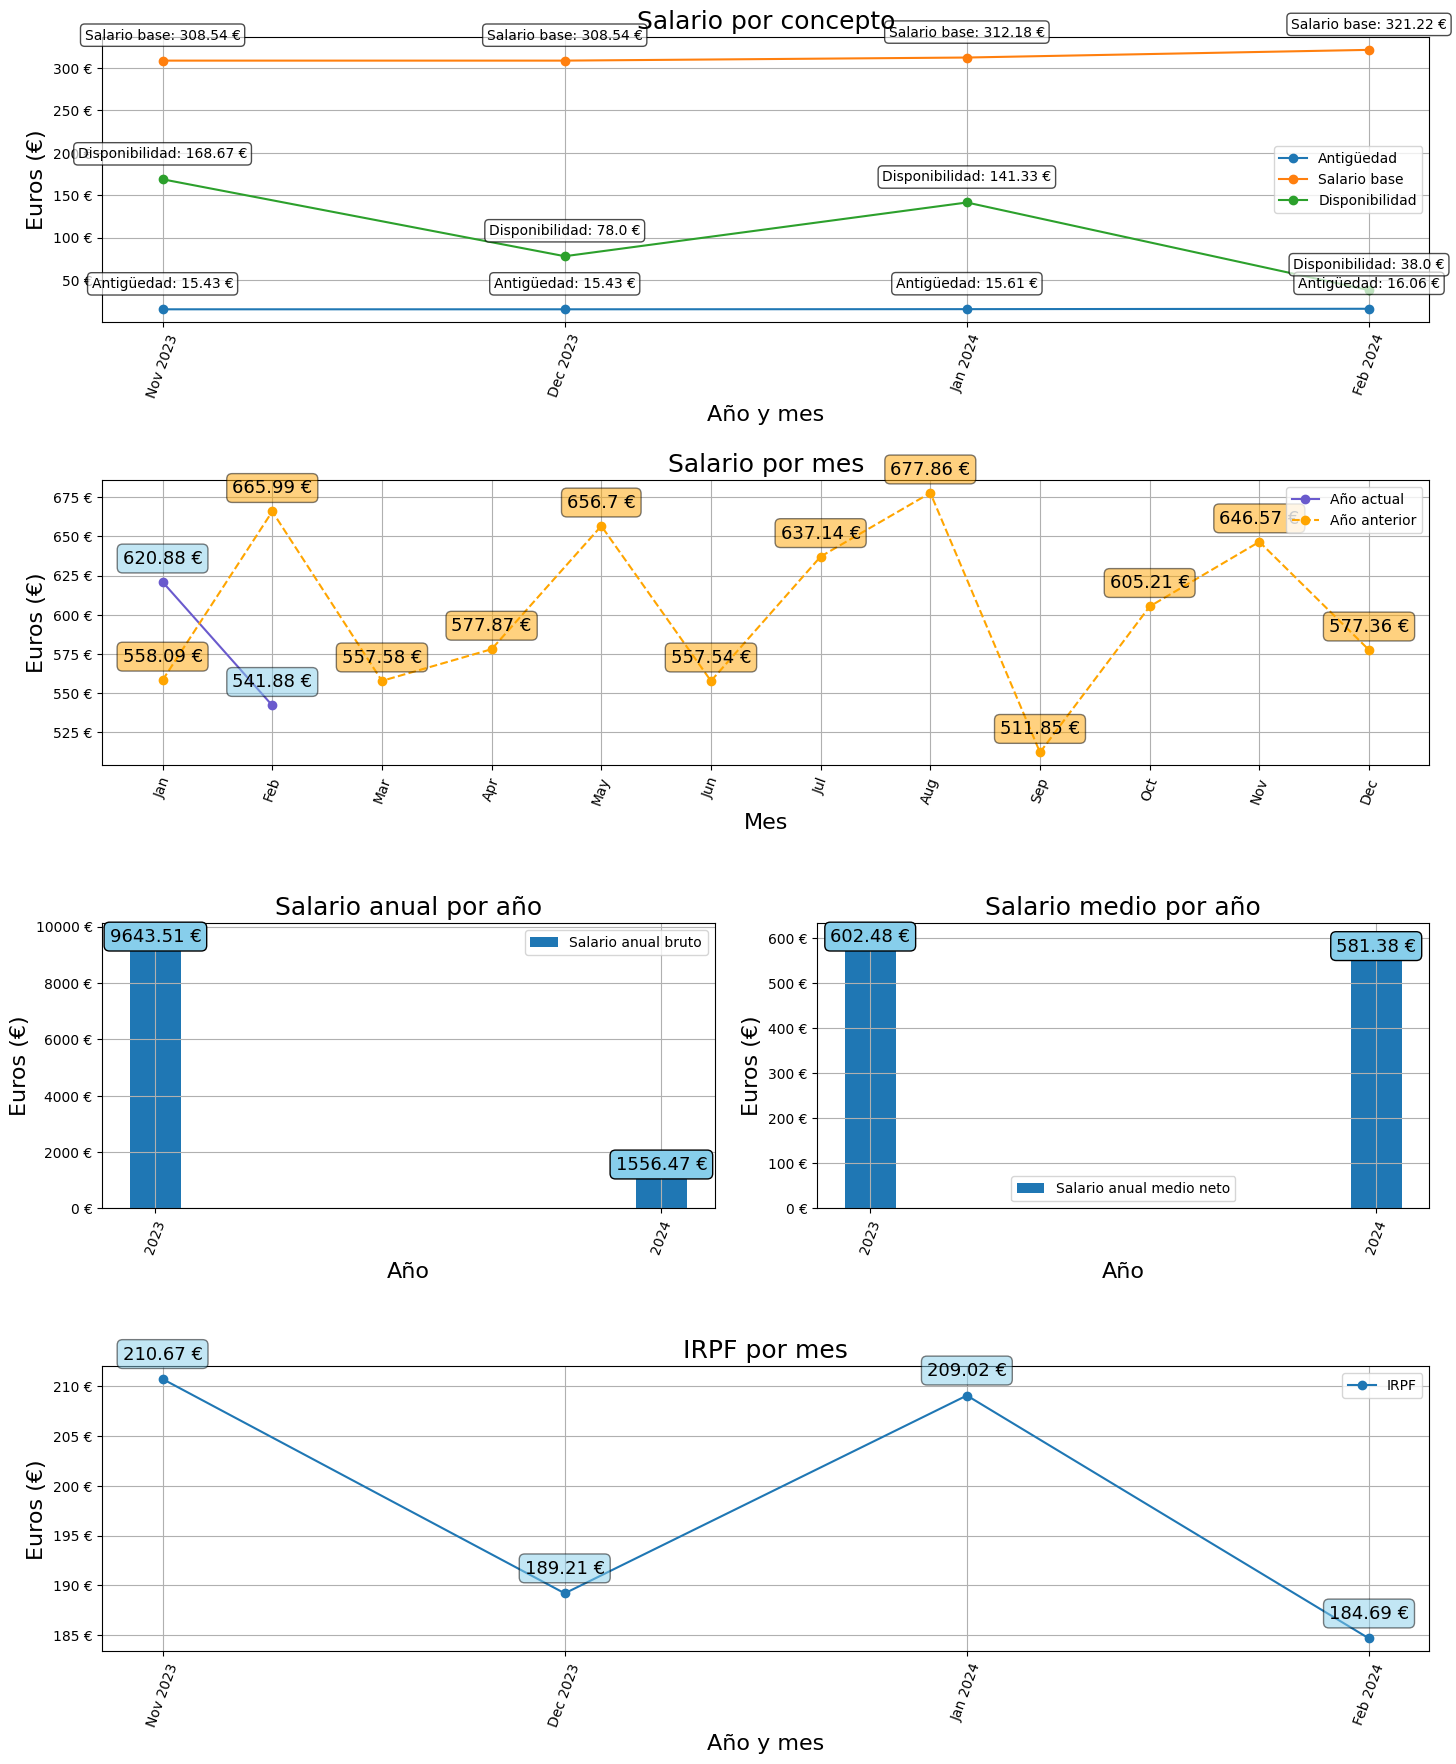

In [30]:
fig, ax = plt.subplot_mosaic("AA;BB;CD;EE", figsize=(15, 18))

ax_a = ax["A"]
ax_b = ax["B"]
ax_c = ax["C"]
ax_d = ax["D"]
ax_e = ax["E"]

df_last_year_last_two_months = df_last_year.loc[
    df_last_year["month_number"].isin([11, 12])
]
df_actual_year_and_two_months = pd.concat(
    [df_last_year_last_two_months, df_actual_year]
)

for concept in df_actual_year_and_two_months.concept.unique():
    if concept in ["liquido", "total"]:
        continue

    ax_a.plot(
        df_actual_year_and_two_months[df_actual_year_and_two_months.concept == concept][
            "label"
        ],
        df_actual_year_and_two_months[df_actual_year_and_two_months.concept == concept][
            "amount"
        ],
        marker="o",
        label=concept,
    )
    for i in range(
        len(
            df_actual_year_and_two_months[
                df_actual_year_and_two_months.concept == concept
            ]
        )
    ):
        y = df_actual_year_and_two_months[
            df_actual_year_and_two_months.concept == concept
        ]["amount"].iloc[i]
        ax_a.text(
            i,
            y + 30,
            f"{concept}: {y} €",
            horizontalalignment="center",
            verticalalignment="center",
            bbox=dict(facecolor="white", boxstyle="round", alpha=0.7),
            size=10,
            color="black",
        )
ax_a.set_title(
    "Salario por concepto",
    fontsize=TITLE_FONT_SIZE,
)
ax_a.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)
ax_a.set_xlabel("Año y mes", fontsize=LABELS_FONT_SIZE)

df_last_year_liquido = df_last_year[df_last_year.concept == "liquido"]
df_actual_year_liquido = df_actual_year[df_actual_year.concept == "liquido"]

ax_b.plot(
    df_actual_year_liquido["month_name"],
    df_actual_year_liquido["amount"],
    color="Slateblue",
    marker="o",
    label="Año actual",
)
ax_b.plot(
    df_last_year_liquido["month_name"],
    df_last_year_liquido["amount"],
    linestyle="--",
    color="orange",
    marker="o",
    label="Año anterior",
)
for i in range(len(df_actual_year_liquido)):
    y = df_actual_year_liquido["amount"].iloc[i]
    ax_b.text(
        i,
        y + 15,
        f"{y} €",
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="skyblue", alpha=ALPHA, boxstyle="round"),
        **ANNOTATES_STYLE,
    )
for i in range(len(df_last_year_liquido)):
    y = df_last_year_liquido["amount"].iloc[i]
    ax_b.text(
        i,
        y + 15,
        f"{y} €",
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="orange", alpha=ALPHA, boxstyle="round"),
        **ANNOTATES_STYLE,
    )
ax_b.set_title(
    "Salario por mes",
    fontsize=TITLE_FONT_SIZE,
)
ax_b.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)
ax_b.set_xlabel("Mes", fontsize=LABELS_FONT_SIZE)

df_total_earnings_by_year = (
    df[df.concept == "total"].groupby(["year"])["amount"].sum().reset_index()
)

ax_c.bar(
    df_total_earnings_by_year["year"],
    df_total_earnings_by_year["amount"],
    label="Salario anual bruto",
    width=0.1,
)
ax_c.xaxis.set_major_locator(plt.MultipleLocator(1))
for i in range(len(df_total_earnings_by_year)):
    y = df_total_earnings_by_year["amount"].iloc[i]
    x = df_total_earnings_by_year["year"].iloc[i]
    ax_c.text(
        x,
        y,
        f"{y} €",
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="skyblue", boxstyle="round"),
        **ANNOTATES_STYLE,
    )
ax_c.set_title(
    "Salario anual por año",
    fontsize=TITLE_FONT_SIZE,
)
ax_c.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)
ax_c.set_xlabel("Año", fontsize=LABELS_FONT_SIZE)

df_mean_earnings_by_year = (
    df[df.concept == "liquido"].groupby("year")["amount"].mean().reset_index()
)

ax_d.bar(
    df_mean_earnings_by_year["year"],
    df_mean_earnings_by_year["amount"],
    label="Salario anual medio neto",
    width=0.1,
)
ax_d.xaxis.set_major_locator(plt.MultipleLocator(1))
for i in range(len(df_mean_earnings_by_year)):
    y = df_mean_earnings_by_year["amount"].iloc[i]
    x = df_mean_earnings_by_year["year"].iloc[i]
    ax_d.text(
        x,
        y,
        f"{y} €",
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="skyblue", boxstyle="round"),
        **ANNOTATES_STYLE,
    )
ax_d.set_title(
    "Salario medio por año",
    fontsize=TITLE_FONT_SIZE,
)
ax_d.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)
ax_d.set_xlabel("Año", fontsize=LABELS_FONT_SIZE)

df_actual_year_and_two_months_shrunken = df_actual_year_and_two_months.drop(
    columns=["year", "month_name", "month_number"]
)
df_irpf = pd.merge(
    df_actual_year_and_two_months_shrunken[
        df_actual_year_and_two_months_shrunken.concept == "total"
    ],
    df_actual_year_and_two_months_shrunken[
        df_actual_year_and_two_months_shrunken.concept == "liquido"
    ],
    on="label",
)
df_irpf["irpf_payment"] = round(df_irpf["amount_x"] - df_irpf["amount_y"], 2)

ax_e.plot(df_irpf["label"], df_irpf["irpf_payment"], label="IRPF", marker="o")
for i in range(len(df_irpf)):
    y = df_irpf["irpf_payment"].iloc[i]
    ax_e.text(
        i,
        y + 2.5,
        f"{y} €",
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="skyblue", alpha=ALPHA, boxstyle="round"),
        **ANNOTATES_STYLE,
    )
ax_e.set_title(
    "IRPF por mes",
    fontsize=TITLE_FONT_SIZE,
)
ax_e.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)
ax_e.set_xlabel("Año y mes", fontsize=LABELS_FONT_SIZE)

set_common_properties(ax_a)
set_common_properties(ax_b)
set_common_properties(ax_c)
set_common_properties(ax_d)
set_common_properties(ax_e)

fig.tight_layout(pad=2.0)

plt.show()